## 1. Import libraries
Here we'll import some libraries, like pandas, matplotlib, seaborn etc.

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## 2. Read data
We'll read all 6 csv-files. After that, let's see, as example, what is given in **Movies.csv**.

In [4]:
df_chapters = pd.read_csv(r"Chapters.csv", encoding='latin1')
df_characters = pd.read_csv(r"Characters.csv", encoding='latin1')
df_dialogue = pd.read_csv(r"Dialogue.csv", encoding='latin1')
df_movies = pd.read_csv(r"Movies.csv", encoding='latin1')
df_places = pd.read_csv(r"Places.csv", encoding='latin1')
df_spells = pd.read_csv(r"Spells.csv", encoding='latin1')

## 3. Exploratory Data Analysis (EDA)
In statistics, **exploratory data analysis** is an approach to analyzing data sets to summarize their main characteristics, often with visual methods. A statistical model can be used or not, but primarily EDA is for seeing what the data can tell us beyond the formal modeling or hypothesis testing task ([Wikipedia](https://en.wikipedia.org/wiki/Exploratory_data_analysis)).

In [3]:
df_movies.head(2)

,ï»¿Movie ID,Movie Title,Release Year,Runtime,Budget,Box Office
0,1,Harry Potter and the Philosopher's Stone,2001,152,"$125,000,000","$1,002,000,000"
1,2,Harry Potter and the Chamber of Secrets,2002,161,"$100,000,000","$880,300,000"


Here we can see, that the first column has strange symbols in the title and two last columns have "$" and "," signs in the cells. **We will change that.**

In [5]:
# rename column
df_movies = df_movies.rename(columns={df_movies.columns[0]: "Movie ID"})

# delete "$" sign in last two columns
df_movies["Budget"] = df_movies["Budget"].apply(lambda x: x.split('$')[1])
df_movies["Box Office"] = df_movies["Box Office"].apply(lambda x: x.split('$')[1])

# remove "," in last two columns
df_movies["Budget"] = df_movies["Budget"].apply(lambda x: int(x.replace(',','')))
df_movies["Box Office"] = df_movies["Box Office"].apply(lambda x: int(x.replace(',','')))

And now we get:

In [6]:
df_movies

,Movie ID,Movie Title,Release Year,Runtime,Budget,Box Office
0,1,Harry Potter and the Philosopher's Stone,2001,152,125000000,1002000000
1,2,Harry Potter and the Chamber of Secrets,2002,161,100000000,880300000
2,3,Harry Potter and the Prisoner of Azkaban,2004,142,130000000,796700000
3,4,Harry Potter and the Goblet of Fire,2005,157,150000000,896400000
4,5,Harry Potter and the Order of the Phoenix,2007,138,150000000,942000000
5,6,Harry Potter and the Half-Blood Prince,2009,153,250000000,943200000
6,7,Harry Potter and the Deathly Hallows Part 1,2010,146,200000000,976900000
7,8,Harry Potter and the Deathly Hallows Part 2,2011,130,250000000,1342000000


## 4. Visualizations
The best part of the notebook! Here we're going to build some interesting plots.


In [7]:
### COMMON FUNCTIONS SHOULD BE HERE

def bar_plot(df, x, column, ax, color):
    """ BAR PLOT """
    ax = df.plot.bar(x=x, 
                     y=column,
                     ax=ax, 
                     color=color, 
                     legend=False)
    ax.set_title(column, fontsize=16)
    
def pie_chart(df, x, column, ax, color):
    """ PIE CHART """
    count_classes = df[x].value_counts()
    n_classes = len(count_classes)
    explode = (0.1,) * n_classes # explode for 0.1 each slice
    ax = df.plot.pie(x=x, 
                     y=column, 
                     ax=ax, 
                     colors=color, 
                     legend=False, 
                     explode=explode,
                     shadow=True)
    ax.set_title(column, fontsize=16)
    
def pie_chart_string(df, column, ax, color):
    """ PIE CHART FOR STRING VALUES """
    count_classes = df[column].value_counts()
    n_classes = len(count_classes)
    explode = (0.05,) * n_classes # explode for 0.1 each slice
    ax = df[column].value_counts().plot(kind='pie', 
                                        ax=ax, 
                                        colors=color, 
                                        explode=explode,
                                        shadow=True)
    ax.set_title(column, fontsize=16)
    
def bar_plot_string(df, column, ax, color):
    """ BAR PLOT FOR STRING VALUES """
    ax = df[column].value_counts().plot(kind='bar', 
                                        ax=ax, 
                                        color=color)
    ax.set_title(column, fontsize=16)    

### 4.1 Movies.csv
Firstly, we'll look through **"Movies.csv"** file. After that we'll plot some visualizations.

The first visualization will be in colors of Hogwarts Houses ❤️💛💚💙

In [8]:
color1 = plt.cm.autumn(np.linspace(0, 1, len(df_movies)))
color2 = plt.cm.summer_r(np.linspace(0, 1, len(df_movies)))
color3 = plt.cm.winter_r(np.linspace(0, 1, len(df_movies)))

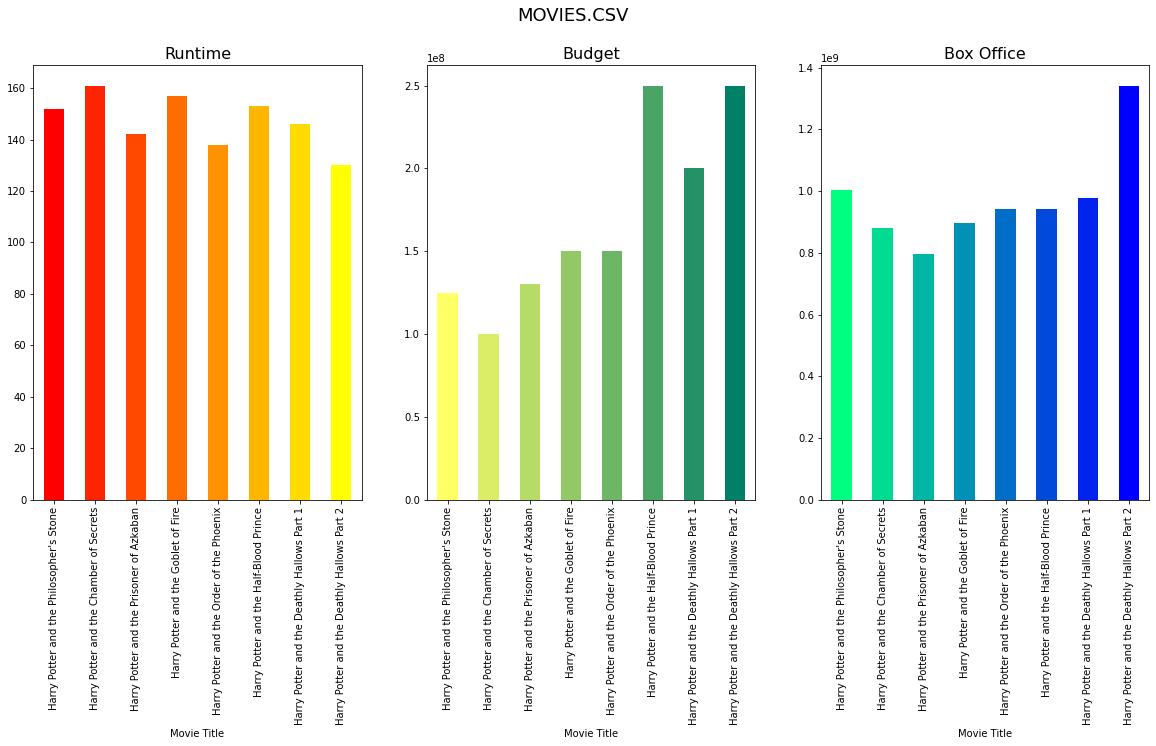

In [9]:
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(20,8))
plt.suptitle("MOVIES.CSV", fontsize=18) 
bar_plot(df_movies, "Movie Title", "Runtime", axes[0], color1)
bar_plot(df_movies, "Movie Title", "Budget", axes[1], color2)
bar_plot(df_movies, "Movie Title", "Box Office", axes[2], color3)
plt.show()

Also, we can represent this data via **pie chart**:

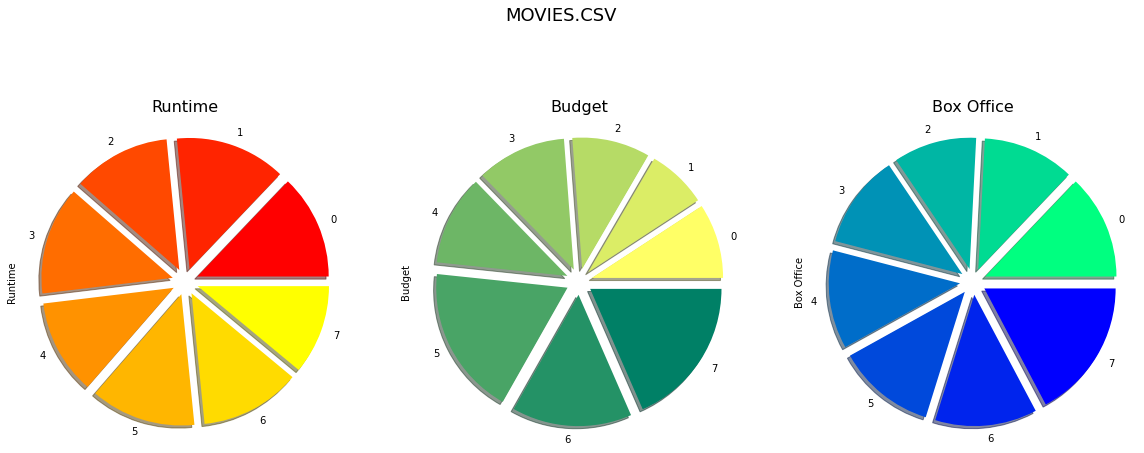

In [10]:
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(20,8))
plt.suptitle("MOVIES.CSV", fontsize=18) 
pie_chart(df_movies, "Movie Title", "Runtime", axes[0], color1)
pie_chart(df_movies, "Movie Title", "Budget", axes[1], color2)
pie_chart(df_movies, "Movie Title", "Box Office", axes[2], color3)
plt.show()

### 4.2 Characters.csv
The next part of visualizations will be devoted to characters of HP Universe.

In [11]:
df_characters.head(7)

,Character ID,Character Name,Species,Gender,House,Patronus,Wand (Wood),Wand (Core)
0,1,Harry Potter,Human,Male,Gryffindor,Stag,Holly,Phoenix Feather
1,2,Ron Weasley,Human,Male,Gryffindor,Jack Russell Terrier,NaN,NaN
2,3,Hermione Granger,Human,Female,Gryffindor,Otter,Vine,Dragon Heartstring
3,4,Albus Dumbledore,Human,Male,Gryffindor,Phoenix,Elder,Thestral Tail Hair
4,5,Rubeus Hagrid,Half-Human/Half-Giant,Male,Gryffindor,NaN,Oak,NaN
5,6,Severus Snape,Human,Male,Slytherin,Doe,NaN,NaN
6,7,Minerva McGonagall,Human,Female,Gryffindor,Cat,Fir,Dragon Heartstring


So, let's plot some **pie charts**.

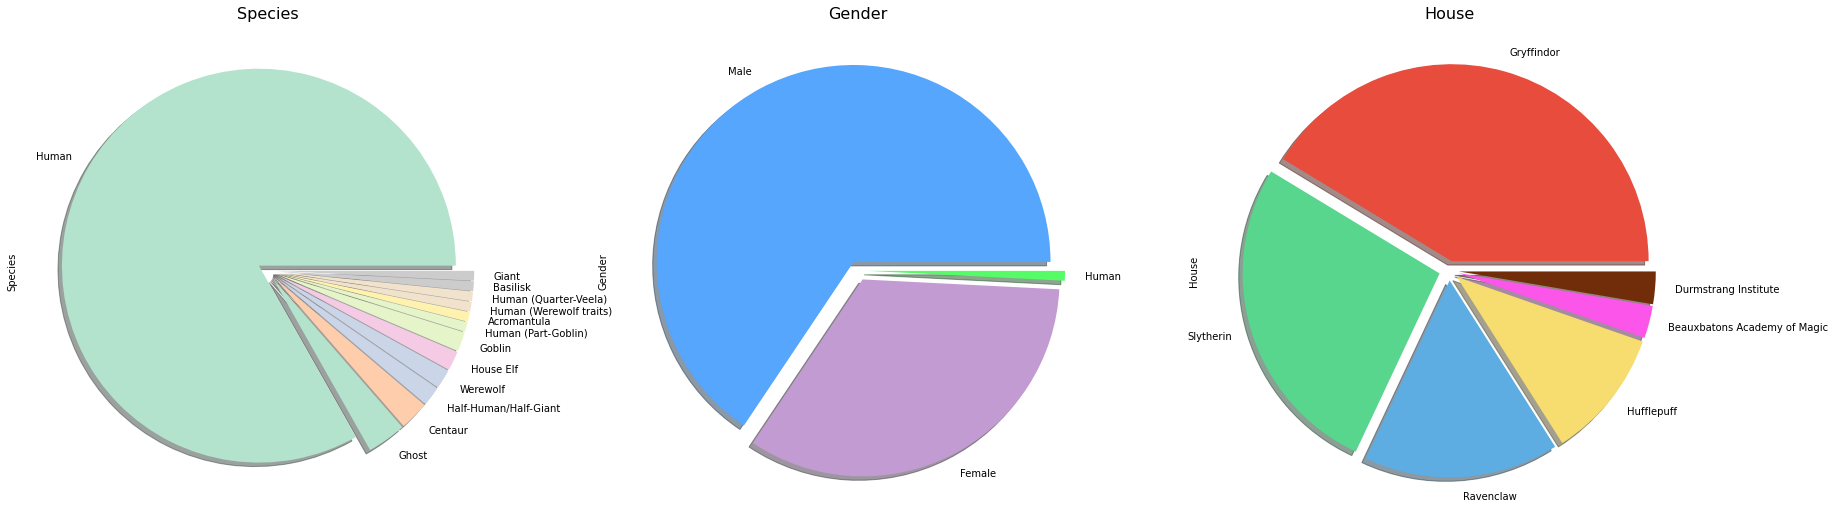

In [12]:
color1 = plt.cm.Pastel2(np.linspace(0, 1, len(df_characters["Species"].value_counts())))
color2 = ["#55A6FC", "#C39BD3", "#55FC67"]
color3 = ["#E74C3C", "#58D68D", "#5DADE2", "#F7DC6F", "#FC55EA", "#712D09"]


fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(30,35))
pie_chart_string(df_characters, "Species", axes[0], color1)
pie_chart_string(df_characters, "Gender", axes[1], color2)
pie_chart_string(df_characters, "House", axes[2], color3)
plt.show()

### 4.3 Places.csv
The next part of visualizations will be devoted to places of Harry Potter Universe.

In [13]:
df_places.head(8)

,Place ID,Place Name,Place Category
0,1,Flourish & Blotts,Diagon Alley
1,2,Gringotts Wizarding Bank,Diagon Alley
2,3,Knockturn Alley,Diagon Alley
3,4,Ollivanders,Diagon Alley
4,5,The Leaky Cauldron,Diagon Alley
5,6,Weasleys' Wizard Wheezes,Diagon Alley
6,7,12 Grimmauld Place,Dwellings
7,8,4 Privet Drive,Dwellings


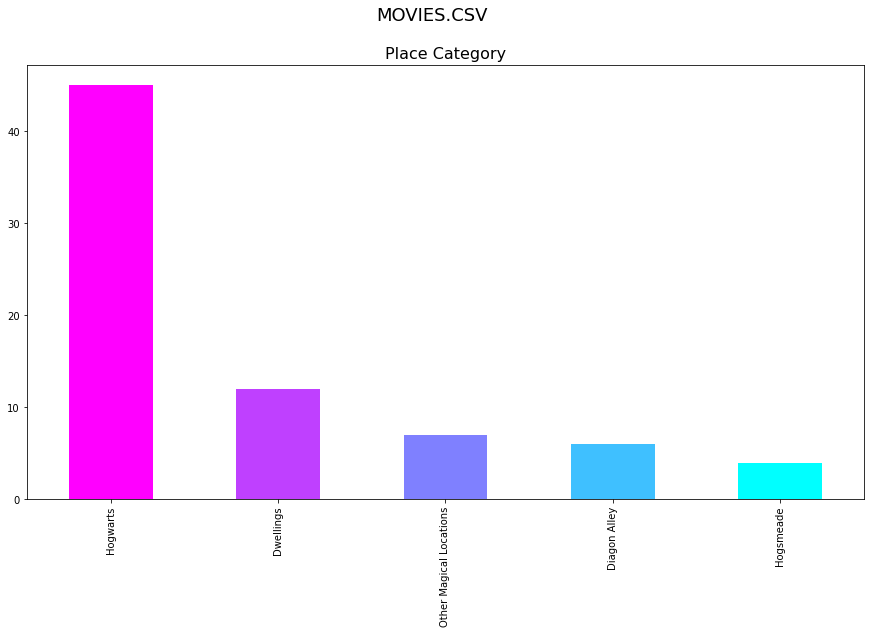

In [14]:
color1 = plt.cm.cool_r(np.linspace(0, 1, len(df_places["Place Category"].value_counts())))


fig, axes = plt.subplots(nrows=1, ncols=1, figsize=(15,8))
plt.suptitle("MOVIES.CSV", fontsize=18) 
bar_plot_string(df_places, "Place Category", axes, color1)
plt.show()